In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rnd
import seaborn as sns

In [2]:
train=pd.read_csv("Trainfile.csv")
test=pd.read_csv("Testfile.csv")

In [3]:
train.shape

(1138, 81)

In [4]:
test.shape

(322, 81)

In [5]:
#dropping the 'Idx' column as it not useful in the prediction process
train_ID = train['Idx']
test_ID = test['Idx']
train.drop("Idx", axis = 1, inplace = True)
test.drop("Idx", axis = 1, inplace = True)

In [6]:
ntrain = train.shape[0]
print(train.shape[0])
ntest = test.shape[0]
print(test.shape[0])
y_train = train.SalePrice.values.copy()
y_test = test.SalePrice.values.copy()
all_data = pd.concat((train, test), sort = 'True').reset_index(drop=True)
print("all_data size is : {}".format(all_data.shape))

1138
322
all_data size is : (1460, 80)


In [7]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
3SsnPorch        1460 non-null int64
Alley            91 non-null object
BedroomAbvGr     1460 non-null int64
BldgType         1460 non-null object
BsmtCond         1423 non-null object
BsmtExposure     1422 non-null object
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtFinType1     1423 non-null object
BsmtFinType2     1422 non-null object
BsmtFullBath     1460 non-null int64
BsmtHalfBath     1460 non-null int64
BsmtQual         1423 non-null object
BsmtUnfSF        1460 non-null int64
CentralAir       1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
Electrical       1459 non-null object
EnclosedPorch    1460 non-null int64
ExterCond        1460 non-null object
ExterQual        1460 non-null object
Exterior1st      1460 non-null 

In [8]:
all_data.get_dtype_counts()

C:\Users\Tejaswi Pagadala\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `get_dtype_counts` has been deprecated and will be removed in a future version. For DataFrames use `.dtypes.value_counts()
  """Entry point for launching an IPython kernel.


float64     3
int64      34
object     43
dtype: int64

In [9]:
#Let us find the correlation of numerical features with the SalePrice
correlation= train.corr()
correlation=correlation['SalePrice'].sort_values(ascending=False)
pos_correlation=correlation.head(all_data.shape[0])
pos_correlation

SalePrice        1.000000
OverallQual      0.791583
GrLivArea        0.696450
GarageCars       0.643390
GarageArea       0.622827
TotalBsmtSF      0.583200
1stFlrSF         0.571859
FullBath         0.570665
YearBuilt        0.529717
TotRmsAbvGrd     0.523361
YearRemodAdd     0.522126
GarageYrBlt      0.495789
MasVnrArea       0.458281
Fireplaces       0.456931
LotFrontage      0.370337
2ndFlrSF         0.338577
BsmtFinSF1       0.334695
OpenPorchSF      0.316538
WoodDeckSF       0.309539
HalfBath         0.290770
LotArea          0.284774
BsmtUnfSF        0.238853
BsmtFullBath     0.213439
BedroomAbvGr     0.184831
ScreenPorch      0.138973
PoolArea         0.102545
MoSold           0.095011
3SsnPorch        0.064660
BsmtFinSF2      -0.010924
LowQualFinSF    -0.012313
YrSold          -0.022898
MiscVal         -0.025218
BsmtHalfBath    -0.036891
MSSubClass      -0.089530
OverallCond     -0.100036
EnclosedPorch   -0.139249
KitchenAbvGr    -0.141781
Name: SalePrice, dtype: float64

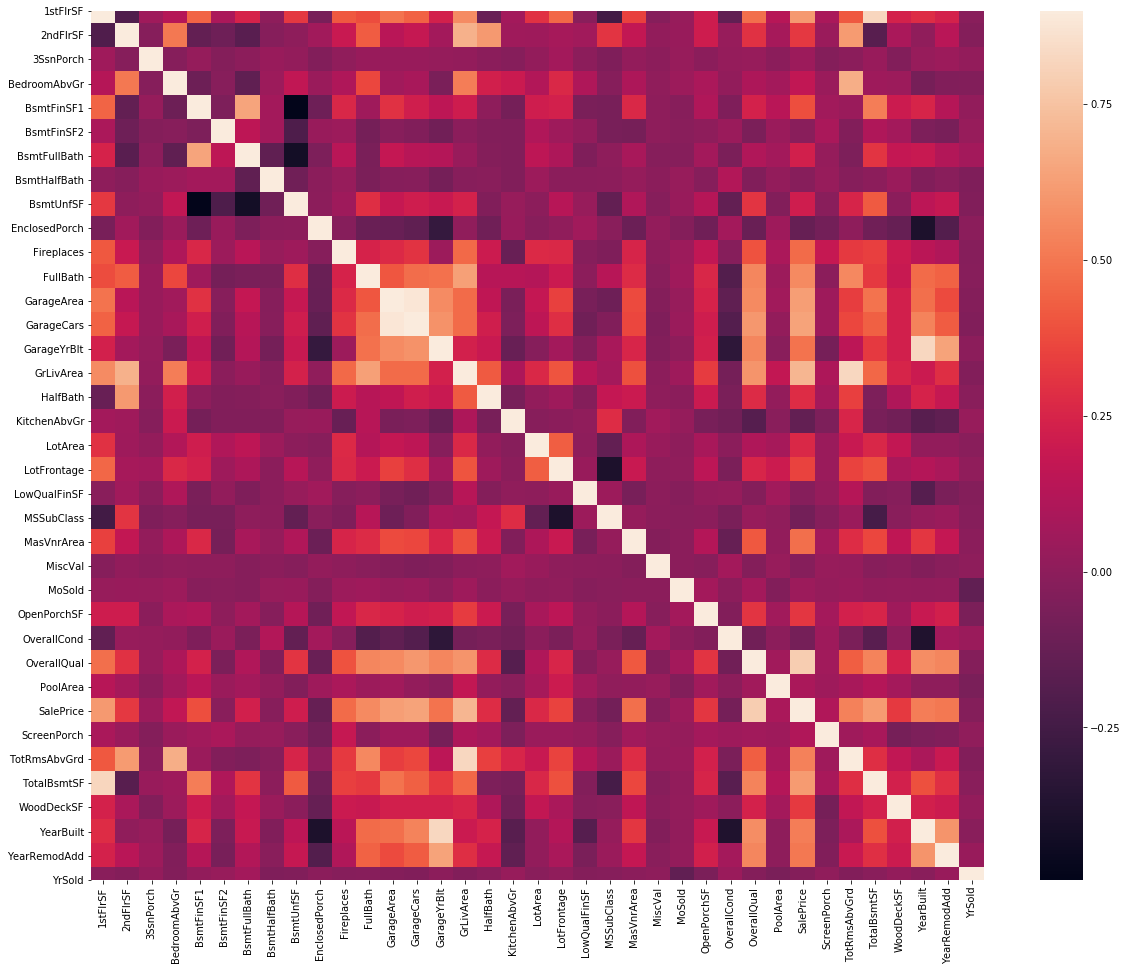

In [10]:
corremap = all_data.corr()
plt.subplots(figsize=(20,16))
sns.heatmap(corremap, vmax=0.9, square=True)



From the correlation map, we observe that:

1.OverallQual, GrLivArea, TotalBsmtSF, GarrageCars, GarrageArea, 1stFlrSF, YearBuilt, FullBath(having correlation greater than 52%) are the most important Predictors.
2.We can see from the above graph that how significantly they are related to our output variable "SalePrice"



->Data Visualisation for better understanding of the data
->Visualising some highly correlated features to get a clear idea


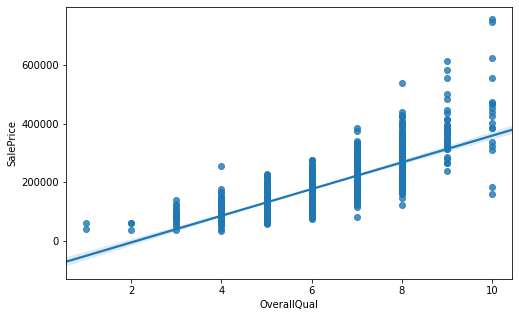

In [11]:
#Sale price vs Overall quality 
plt.figure(figsize=[8,5])
sns.regplot(all_data['OverallQual'], all_data['SalePrice'])

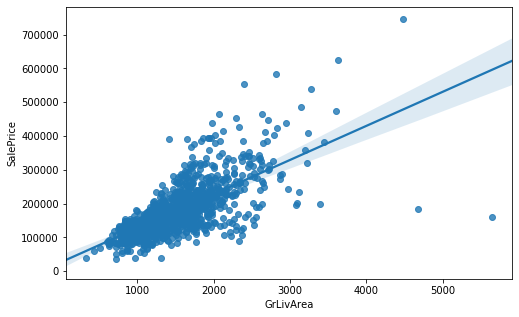

In [12]:
#Sale price vs ground living area
plt.figure(figsize=[8,5])
sns.regplot(train['GrLivArea'], train['SalePrice'])

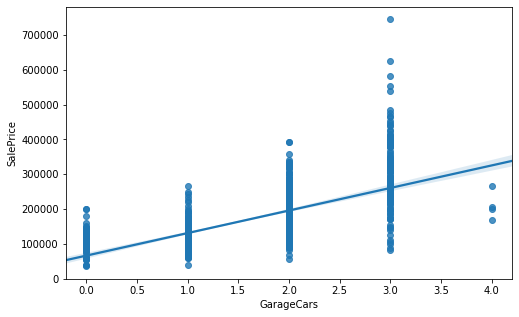

In [13]:
#Sale price vs garage cars
plt.figure(figsize=[8,5])
sns.regplot(train['GarageCars'], train['SalePrice'])

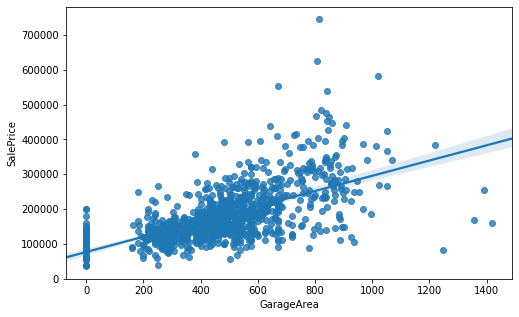

In [14]:
#Sale price vs garage area
plt.figure(figsize=[8,5])
sns.regplot(train['GarageArea'], train['SalePrice'])

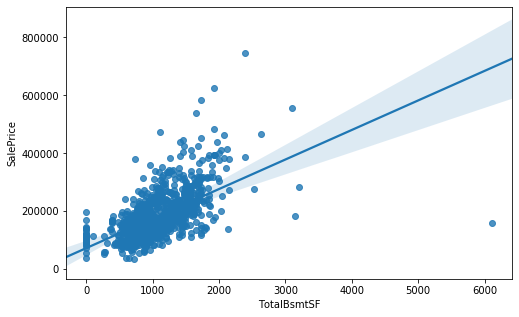

In [15]:
#Sale price vs TotalBsmtSF
plt.figure(figsize=[8,5])
sns.regplot(train['TotalBsmtSF'], train['SalePrice'])

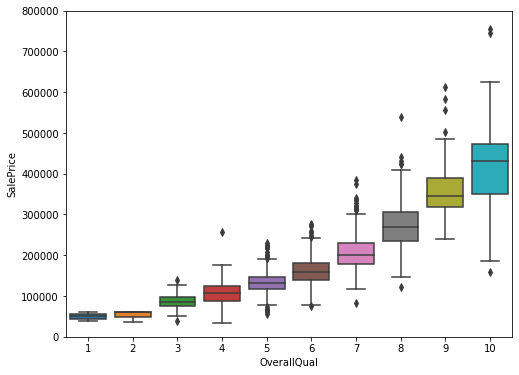

In [16]:
#now let us visualise some categorical features
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([all_data['SalePrice'], all_data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

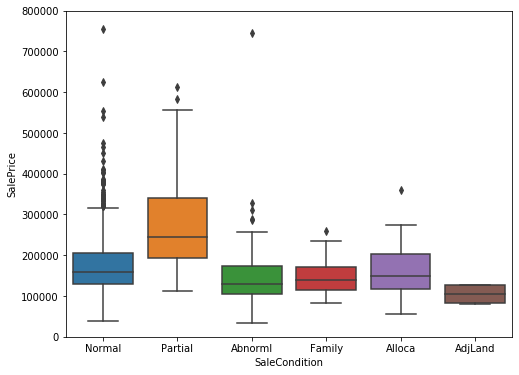

In [17]:
#box plot landcontour/saleprice
var = 'SaleCondition'
data = pd.concat([all_data['SalePrice'], all_data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

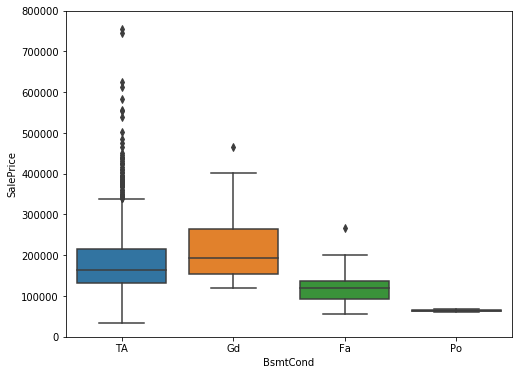

In [18]:
var = 'BsmtCond'
data = pd.concat([all_data['SalePrice'], all_data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

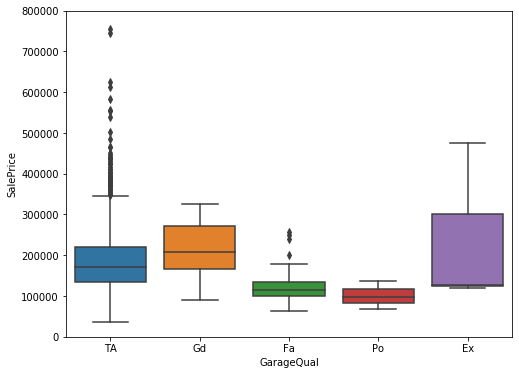

In [19]:
var = 'GarageQual'
data = pd.concat([all_data['SalePrice'], all_data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

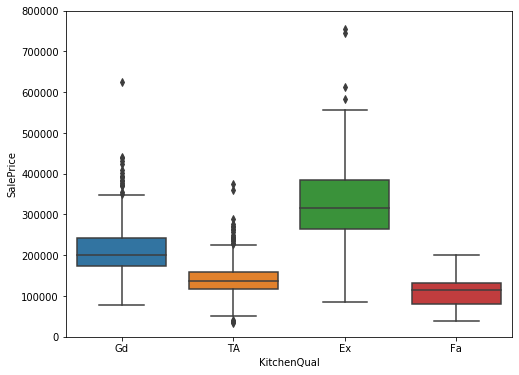

In [20]:
var = 'KitchenQual'
data = pd.concat([all_data['SalePrice'], all_data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

In [21]:
all_data['haspool'] = all_data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
all_data ['has2ndfloor'] = all_data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasgarage'] = all_data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasbsmt'] = all_data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasfireplace'] = all_data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [22]:
#dealing with missing values
#number of missing values in each column
all_data.isnull().sum().sort_values(ascending = False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
                ... 
MoSold             0
Neighborhood       0
OpenPorchSF        0
OverallCond        0
1stFlrSF           0
Length: 85, dtype: int64

In [23]:
#percentage of missing values
missing_values = (all_data.isnull().sum()/all_data.shape[0]) * 100
missing_values.sort_values(ascending = False)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
                  ...    
MoSold           0.000000
Neighborhood     0.000000
OpenPorchSF      0.000000
OverallCond      0.000000
1stFlrSF         0.000000
Length: 85, dtype: float64

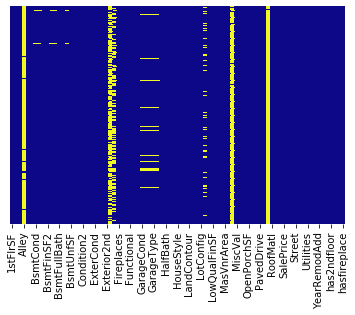

In [24]:
sns.heatmap(all_data.isnull(), yticklabels = False, cbar = False, cmap = 'plasma')

<Figure size 1008x648 with 0 Axes>

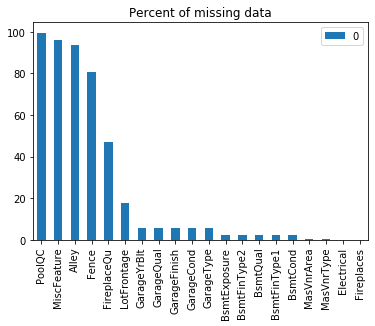

In [25]:
missing_data = (all_data.isnull().sum() / len(all_data)).sort_values(ascending = False)*100

missing_data = pd.DataFrame(missing_data)

plt.figure(figsize = (14,9))
missing_data.head(20).plot(kind = 'bar')
plt.title('Percent of missing data');

In [26]:
#We divide the data into numerical and categorical data for easy preprocessing
num_features=all_data.select_dtypes(include=['int64','float64'])
categorical_features=all_data.select_dtypes(include='object')

In [27]:
num_features.shape

(1460, 42)

In [28]:
num_features.describe

<bound method NDFrame.describe of       1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr  BsmtFinSF1  BsmtFinSF2  \
0          832         0          0             2           0           0   
1         1542      1330          0             4         896           0   
2          899         0          0             3         450           0   
3         1133      1349          0             4           0           0   
4         2402         0          0             2        1767         539   
...        ...       ...        ...           ...         ...         ...   
1455       990         0          0             3         495           0   
1456      1496       636          0             1        1441           0   
1457      1264         0          0             3         697           0   
1458      1675      1818          0             3           0           0   
1459      1634         0          0             3           0           0   

      BsmtFullBath  BsmtHalfBath  BsmtUnf

In [29]:
categorical_features.describe

<bound method NDFrame.describe of      Alley BldgType BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 BsmtQual  \
0      NaN     1Fam       TA           No          Unf          Unf       TA   
1      NaN     1Fam       Gd           No          ALQ          Unf       Gd   
2      NaN     1Fam       TA           No          ALQ          Unf       TA   
3      NaN     1Fam       Gd           Gd          Unf          Unf       Gd   
4      NaN     1Fam       TA           Gd          GLQ          ALQ       Ex   
...    ...      ...      ...          ...          ...          ...      ...   
1455   NaN     1Fam       TA           No          GLQ          Unf       Gd   
1456   NaN     1Fam       TA           Gd          GLQ          Unf       Gd   
1457   NaN     1Fam       TA           No          Rec          Unf       TA   
1458   NaN     1Fam       TA           No          Unf          Unf       TA   
1459   NaN     1Fam       TA           No          Unf          Unf       Gd   

     

In [30]:
#percentage of missing values in numerical features
missing_values = (num_features.isnull().sum()/num_features.shape[0]) * 100
missing_values.sort_values(ascending = False)

LotFrontage      17.739726
GarageYrBlt       5.547945
MasVnrArea        0.547945
hasfireplace      0.000000
Fireplaces        0.000000
KitchenAbvGr      0.000000
HalfBath          0.000000
GrLivArea         0.000000
GarageCars        0.000000
GarageArea        0.000000
FullBath          0.000000
EnclosedPorch     0.000000
BsmtUnfSF         0.000000
BsmtHalfBath      0.000000
BsmtFullBath      0.000000
BsmtFinSF2        0.000000
BsmtFinSF1        0.000000
BedroomAbvGr      0.000000
3SsnPorch         0.000000
2ndFlrSF          0.000000
LotArea           0.000000
LowQualFinSF      0.000000
hasbsmt           0.000000
MSSubClass        0.000000
hasgarage         0.000000
has2ndfloor       0.000000
haspool           0.000000
YrSold            0.000000
YearRemodAdd      0.000000
YearBuilt         0.000000
WoodDeckSF        0.000000
TotalBsmtSF       0.000000
TotRmsAbvGrd      0.000000
ScreenPorch       0.000000
SalePrice         0.000000
PoolArea          0.000000
OverallQual       0.000000
O

In [31]:
"""LotFrontage : Since the area of each street connected to the house property most likely to have a similar area 
   to other houses in its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood."""

all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [32]:
all_data['LotFrontage'].isnull().sum()

0

In [33]:
'''The following variables are either discrete numerical or continuous numerical variables.So the will be imputed by median.'''
to_impute_by_median = all_data.loc[:, ['MasVnrArea', 'GarageYrBlt']]
for i in to_impute_by_median.columns:
    all_data[i].fillna(all_data[i].median(), inplace = True)

In [34]:
all_data['GarageYrBlt'].isnull().sum()

0

In [35]:
all_data['MasVnrArea'].isnull().sum()

0

In [36]:
#percentage of missing values in categorical features
missing_values = (categorical_features.isnull().sum()/categorical_features.shape[0]) * 100
missing_values.sort_values(ascending = False)

PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
FireplaceQu      47.260274
GarageCond        5.547945
GarageFinish      5.547945
GarageType        5.547945
GarageQual        5.547945
BsmtExposure      2.602740
BsmtFinType2      2.602740
BsmtCond          2.534247
BsmtFinType1      2.534247
BsmtQual          2.534247
MasVnrType        0.547945
Electrical        0.068493
Neighborhood      0.000000
ExterCond         0.000000
Exterior2nd       0.000000
Exterior1st       0.000000
ExterQual         0.000000
CentralAir        0.000000
Condition2        0.000000
Condition1        0.000000
BldgType          0.000000
SaleType          0.000000
SaleCondition     0.000000
Foundation        0.000000
Functional        0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Street            0.000000
PavedDrive        0.000000
Heating           0.000000
HeatingQC         0.000000
HouseStyle        0.000000
KitchenQual       0.000000
L

In [37]:
#Let us now drop some categprical features that are not so useful


categorical_features.drop('FireplaceQu', axis=1, inplace=True)


C:\Users\Tejaswi Pagadala\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Variables like PoolQC, MiscFeature, Alley, Fence, and FirePlaceQu have most missing variables. Usually we drop a variable if more than 40-50% of its values are missing. Hence, one might drop variables like PoolQC, MiscFeature, Alley, Fence, and FirePlaceQu. Deleting these variables would be a mistake because NaN means that the variable is absent. Like 'NaN' in PoolQC refers to 'No Pool', 'NaN' in MiscFeature refers to 'None', and 'NaN' in Alley means 'No alley' etc. 

In [38]:
'''fill None where NaN means something.'''
to_impute_by_none = all_data.loc[:, ['GarageType', 'GarageCond','GarageFinish','GarageQual','BsmtFinType2','BsmtExposure','BsmtQual','BsmtCond','BsmtFinType1','MasVnrType']]
for i in to_impute_by_none.columns:
    all_data[i].fillna('None', inplace = True)

In [39]:
'''for electricity (categorical variable) and will be imputed by mode.'''
to_impute_by_mode =  all_data.loc[:, ['Electrical']]
for i in to_impute_by_mode.columns:
    all_data[i].fillna(all_data[i].mode()[0], inplace = True)

In [40]:
missing_val_col = [
                   "GarageType",
                   "GarageFinish",
                   "GarageQual",
                   "GarageCond",
                   'BsmtQual',
                   'BsmtCond',
                   'BsmtExposure',
                   'BsmtFinType1',
                   'BsmtFinType2',
                   'MasVnrType']

for i in missing_val_col:
    print(all_data[i].isnull().sum())

0
0
0
0
0
0
0
0
0
0


In [41]:
all_data['Electrical'].isnull().sum()

0

In [42]:
#percentage of missing values
missing_values = (all_data.isnull().sum()/all_data.shape[0]) * 100
missing_values.sort_values(ascending = False)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
                  ...    
MiscVal          0.000000
MoSold           0.000000
Neighborhood     0.000000
OpenPorchSF      0.000000
1stFlrSF         0.000000
Length: 85, dtype: float64

Once we are done handling missing values, we have to focus our attention on feature selection.We have to convert categorical variables into numerical variables in order to help predict our hypothesis

In [43]:
categorical_features.shape[1]

42

Before performing label encoding or one hot encoding , we need to convert categorical variables into the dtype 'category'

In [44]:
categorical_features.head()

,Alley,BldgType,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,CentralAir,Condition1,Condition2,...,MiscFeature,Neighborhood,PavedDrive,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,Street,Utilities
0,NaN,1Fam,TA,No,Unf,Unf,TA,Y,Artery,Norm,...,NaN,NAmes,Y,NaN,CompShg,Gable,Normal,WD,Pave,AllPub
1,NaN,1Fam,Gd,No,ALQ,Unf,Gd,Y,PosN,Norm,...,NaN,NWAmes,Y,NaN,CompShg,Gable,Normal,WD,Pave,AllPub
2,NaN,1Fam,TA,No,ALQ,Unf,TA,Y,Norm,Norm,...,NaN,Sawyer,Y,NaN,CompShg,Hip,Normal,WD,Pave,AllPub
3,NaN,1Fam,Gd,Gd,Unf,Unf,Gd,Y,Norm,Norm,...,NaN,Timber,Y,NaN,CompShg,Hip,Normal,WD,Pave,AllPub
4,NaN,1Fam,TA,Gd,GLQ,ALQ,Ex,Y,Norm,Norm,...,NaN,NridgHt,Y,NaN,CompShg,Hip,Normal,WD,Pave,AllPub


In [45]:
categorical_features.shape

(1460, 42)

In [46]:
# Get Dummies 
one_hot_encoded_cat_data = pd.get_dummies(categorical_features)

In [47]:
one_hot_encoded_cat_data.head()

,Alley_Grvl,Alley_Pave,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
1,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
3,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,1,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0


In [48]:
one_hot_encoded_cat_data.shape

(1460, 247)

In [49]:
one_hot_encoded_cat_data.columns

Index(['Alley_Grvl', 'Alley_Pave', 'BldgType_1Fam', 'BldgType_2fmCon',
       'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE', 'BsmtCond_Fa',
       'BsmtCond_Gd', 'BsmtCond_Po',
       ...
       'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New',
       'SaleType_Oth', 'SaleType_WD', 'Street_Grvl', 'Street_Pave',
       'Utilities_AllPub', 'Utilities_NoSeWa'],
      dtype='object', length=247)

In [50]:
all_data.isnull().any()

1stFlrSF        False
2ndFlrSF        False
3SsnPorch       False
Alley            True
BedroomAbvGr    False
                ...  
haspool         False
has2ndfloor     False
hasgarage       False
hasbsmt         False
hasfireplace    False
Length: 85, dtype: bool

In [51]:
#Let us drop some numerical features which have negative correlation with the SalePrice

num_features.drop('YrSold', axis=1, inplace=True)
num_features.drop('MiscVal', axis=1, inplace=True)
num_features.drop('BsmtHalfBath', axis=1, inplace=True)
num_features.drop('MSSubClass', axis=1, inplace=True)
num_features.drop('EnclosedPorch', axis=1, inplace=True)
num_features.drop('KitchenAbvGr', axis=1, inplace=True)



In [52]:
num_features.drop('BsmtFinSF2', axis=1, inplace=True)

In [53]:
num_features.shape

(1460, 35)

In [54]:
combine_data=[num_features,one_hot_encoded_cat_data]
all_data_preprocessed=pd.concat(combine_data,axis=1)

In [55]:
all_data_preprocessed.shape

(1460, 282)

In [56]:
#the last step of preprocessing is to do mean normalization on all the columns
normalized_all_data_preprocessed=(all_data_preprocessed-all_data_preprocessed.mean())/all_data_preprocessed.std()



In [57]:
normalized_all_data_preprocessed.shape

(1460, 282)

In [58]:
#Re-spliting the data into train and test datasets
train_data_final=normalized_all_data_preprocessed.iloc[:ntrain,:]
test_data_final=normalized_all_data_preprocessed.iloc[ntrain:,:]
print(train_data_final.shape)
test_data_final.shape

(1138, 282)


(322, 282)

In [59]:
train_data_final.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFullBath', 'BsmtUnfSF', 'Fireplaces', 'FullBath', 'GarageArea',
       ...
       'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New',
       'SaleType_Oth', 'SaleType_WD', 'Street_Grvl', 'Street_Pave',
       'Utilities_AllPub', 'Utilities_NoSeWa'],
      dtype='object', length=282)

In [60]:
train_SalePrice = train_data_final['SalePrice']
test_SalePrice = test_data_final['SalePrice']
train_data_final.drop("SalePrice", axis = 1, inplace = True)
test_data_final.drop("SalePrice", axis = 1, inplace = True)

In [61]:
train_data_final.shape

(1138, 281)

In [62]:
test_data_final.shape

(322, 281)

In [63]:
X=np.asarray(train_data_final)
y_train_SalePrice=np.asarray(y_train)
X_test=np.asarray(test_data_final)
y_actual_SalePrice=np.asarray(y_test)

In [64]:

y_train_SalePrice=np.log(y_train_SalePrice+1)
y_actual_SalePrice=np.log(y_actual_SalePrice+1)

In [65]:
print(X)

[[-0.85524366 -0.79489086 -0.11629944 ...  0.06421621  0.0261712
  -0.0261712 ]
 [ 0.98133813  2.25187514 -0.11629944 ...  0.06421621  0.0261712
  -0.0261712 ]
 [-0.68193242 -0.79489086 -0.11629944 ...  0.06421621  0.0261712
  -0.0261712 ]
 ...
 [-0.24477422 -0.79489086 -0.11629944 ...  0.06421621  0.0261712
  -0.0261712 ]
 [ 1.61767492 -0.79489086 -0.11629944 ...  0.06421621  0.0261712
  -0.0261712 ]
 [ 0.18462378 -0.79489086 -0.11629944 ...  0.06421621  0.0261712
  -0.0261712 ]]


In [66]:
X[1]

array([ 0.98133813,  2.25187514, -0.11629944,  1.38954664,  0.9918048 ,
        1.1074307 , -0.30153966,  0.60028925,  0.78947002,  0.68295864,
        0.31161787, -0.06100367,  2.58151654,  1.2271649 ,  0.1713382 ,
               nan, -0.12020054,  1.7690476 ,  0.25080471,  3.55197458,
        1.28024657, -0.07181151, -0.06866822, -0.2701158 ,  2.75760446,
        0.62130668,  3.63618847,  0.18978942,  0.49087173, -0.06938529,
        1.14581315,  0.24227667,  0.16119428,  0.9463034 , -0.18824639,
       -0.16992291,  0.44338084, -0.14723666, -0.1921107 , -0.17414079,
       -0.29092505, -0.17827041,  4.63107318, -0.03702435, -2.96523713,
       -0.42219365, -0.31778387, -0.29092505,  0.72913635,  2.37328951,
       -0.33574933, -0.63314838, -0.2309859 , -0.31647658, -0.6459023 ,
       -0.11478788, -0.15201842, -0.09836285, -0.18030403, -0.19590947,
        0.40287608, -0.30050632, -0.1566671 ,  1.16684461, -0.89425863,
       -0.2637222 ,  0.2637222 , -0.18431237, -0.24227667, -2.50

In [67]:
"As we can see above there are Nan values present in some columns"
"so we fill those nan values with the mean of that column"
#Obtain mean of columns where Nan is present, nanmean is just convenient.
col_mean = np.nanmean(X, axis=0)
print(col_mean)



[-2.26423377e-02  1.90321198e-02 -1.57692774e-02  8.61001138e-03
 -6.82415760e-03 -6.72729277e-05 -1.08275752e-02 -1.44617641e-02
 -1.60269089e-02 -1.25000905e-02 -2.23251509e-02  1.87011245e-03
 -4.40954025e-04  1.62267483e-02 -2.43770729e-02  1.78733620e-02
  4.39042387e-03 -4.91648177e-03  3.78894054e-03  1.25943804e-02
  1.99470619e-02  8.88232769e-03 -8.06252326e-03 -8.79990817e-03
  1.28314201e-02 -2.61949002e-02 -3.08847580e-02 -9.01244105e-03
 -3.62755093e-03 -5.80097986e-03  1.80264180e-02 -1.86665897e-02
 -6.48513543e-03 -3.83235885e-03 -2.88490079e-02  5.54294389e-03
  2.53249163e-03  1.11936254e-02 -2.51922918e-03  1.80994826e-02
 -1.91779284e-02  4.69957135e-03  1.42067303e-02  1.04761345e-02
 -1.70093124e-02  1.16200704e-02 -1.04863760e-02 -9.35574336e-03
  3.36155455e-04  2.33776888e-02  1.64182747e-02 -2.87821338e-02
 -1.47349099e-02  1.62802876e-02 -6.09814984e-03  9.22677515e-03
 -1.60867333e-02  9.80418031e-03 -1.43559866e-02 -1.90387844e-02
  1.52229099e-02 -1.05582

In [68]:
#Finding indices that need to replaced
indices = np.where(np.isnan(X))


In [69]:
#Place column means in the indices. Align the arrays using take
X[indices] = np.take(col_mean, indices[1])

In [70]:
print(X)

[[-0.85524366 -0.79489086 -0.11629944 ...  0.06421621  0.0261712
  -0.0261712 ]
 [ 0.98133813  2.25187514 -0.11629944 ...  0.06421621  0.0261712
  -0.0261712 ]
 [-0.68193242 -0.79489086 -0.11629944 ...  0.06421621  0.0261712
  -0.0261712 ]
 ...
 [-0.24477422 -0.79489086 -0.11629944 ...  0.06421621  0.0261712
  -0.0261712 ]
 [ 1.61767492 -0.79489086 -0.11629944 ...  0.06421621  0.0261712
  -0.0261712 ]
 [ 0.18462378 -0.79489086 -0.11629944 ...  0.06421621  0.0261712
  -0.0261712 ]]


In [71]:
print(X.shape[0])
print(X.shape[1])

1138
281


In [72]:
print(X_test)

[[ 0.29326664 -0.79489086 -0.11629944 ...  0.06421621  0.0261712
  -0.0261712 ]
 [ 0.46399115 -0.79489086 -0.11629944 ...  0.06421621  0.0261712
  -0.0261712 ]
 [-0.81644264  1.7272816  -0.11629944 ...  0.06421621  0.0261712
  -0.0261712 ]
 ...
 [ 0.26222582 -0.79489086 -0.11629944 ...  0.06421621  0.0261712
  -0.0261712 ]
 [ 1.32537387  3.36978628 -0.11629944 ...  0.06421621  0.0261712
  -0.0261712 ]
 [ 1.21931774 -0.79489086 -0.11629944 ...  0.06421621  0.0261712
  -0.0261712 ]]


In [73]:
print(X_test[1])

[ 0.46399115 -0.79489086 -0.11629944  0.16372302 -0.42236468 -0.81968351
 -0.17254155  0.60028925  0.78947002 -0.0747417   0.31161787 -0.46603046
 -0.33010499 -0.7613598  -0.07281924         nan -0.12020054 -0.57263729
  0.99055194 -0.70424195 -0.51702265 -0.07181151 -0.06866822  3.26304654
  0.2966616   0.71704292 -0.7519182  -0.14130457 -0.86536214 -0.06938529
 -0.87214487  0.24227667  0.16119428  0.9463034  -0.18824639 -0.16992291
  0.44338084 -0.14723666 -0.1921107  -0.17414079 -0.29092505 -0.17827041
 -0.21578477 -0.03702435  0.33701017 -0.42219365 -0.31778387 -0.29092505
  0.72913635 -0.42106749 -0.33574933 -0.63314838 -0.2309859   3.15762723
 -0.6459023  -0.11478788 -0.15201842 -0.09836285  5.54238904 -0.19590947
 -2.48045272 -0.30050632 -0.1566671  -0.85642514  1.11747881 -0.2637222
  0.2637222  -0.18431237  4.12468552 -2.50912035 -0.07420154 -0.11478788
 -0.08709904 -0.13460566 -0.03702435 -0.05860096 -0.03702435 -0.06421621
  0.10185044 -0.0261712  -0.03702435 -0.0261712  -0.

In [74]:
"As we can see above there are Nan values present in some columns"
"so we fill those nan values with the mean of that column"
#Obtain mean of columns where Nan is present, nanmean is just convenient.
column_mean = np.nanmean(X_test, axis=0)
print(column_mean)

[ 0.08002168 -0.06726258  0.05573117 -0.03042917  0.02411768  0.00023775
  0.0382664   0.05111021  0.05664168  0.04417734  0.07890069 -0.00647579
  0.0015584  -0.05734795  0.08615251 -0.06374606 -0.01551647  0.01739205
 -0.01339073 -0.04451057 -0.07049614 -0.03139158  0.02849426  0.0311003
 -0.04534831  0.09257701  0.10915172  0.03185142  0.01282035  0.0205016
 -0.06370827  0.06597074  0.02291952  0.01354418  0.10195705 -0.01958966
 -0.00895023 -0.03956008  0.00890336 -0.06396649  0.0677779  -0.01660904
 -0.05020888 -0.03702435  0.06011366 -0.04106721  0.03706055  0.03306471
 -0.00118803 -0.08262053 -0.05802483  0.10172071  0.05207555 -0.05753717
  0.02155185 -0.03260891  0.05685311 -0.03464956  0.05073638  0.06728614
 -0.05380022  0.03731455  0.06658699  0.02325736 -0.05707597 -0.04974427
  0.04974427  0.02461314 -0.03884675  0.0641937  -0.03214632 -0.0600019
 -0.05119712 -0.0172357  -0.03702435 -0.00545972  0.13085004 -0.01568843
 -0.05208501 -0.0261712  -0.03702435  0.09249323  0.09

In [75]:
#Finding indices that need to replaced
Indices = np.where(np.isnan(X_test))


In [76]:
#Place column means in the indices. Align the arrays using take
X_test[Indices] = np.take(column_mean, Indices[1])

In [77]:
print(X_test.shape[0])
print(X_test.shape[1])

322
281


In [78]:
print(y_train_SalePrice)


[11.56647571 12.51356102 11.77529742 ... 11.94795585 12.37370772
 12.10016198]


In [79]:
y_train_SalePrice.shape

(1138,)

In [80]:
def hypothesis(theta, X, n):
    h = np.ones((X.shape[0],1))
    theta = theta.reshape(1,n+1)
    for i in range(0,X.shape[0]):
        h[i] = float(np.matmul(theta, X[i]))
    h = h.reshape(X.shape[0])
    return h
def BatchGradientDescent(theta, alpha, num_iters, h, X, y, n):
    cost = np.ones(num_iters)
    for i in range(0,num_iters):
        theta[0] = theta[0] - (alpha/X.shape[0])*(sum(h - y))
        for j in range(1,n+1):
            theta[j] = theta[j] - (alpha/X.shape[0])*sum((h-y)* X.transpose()[j])
        h = hypothesis(theta, X, n)
        cost[i] = (1/X.shape[0]) * 0.5 * sum(np.square(h - y))
    theta = theta.reshape(1,n+1)
    return theta, cost
def linear_regression(X, y, alpha, num_iters):
    n = X.shape[1]
    one_column = np.ones((X.shape[0],1))
    X = np.concatenate((one_column, X), axis = 1)
    # initializing the parameter vector...
    theta = np.zeros(n+1)
    # hypothesis calculation....
    h = hypothesis(theta, X, n)
    # returning the optimized parameters by Gradient Descent...
    theta, cost = BatchGradientDescent(theta,alpha,num_iters,h,X,y,n)
    return theta, cost

In [81]:
# calling the principal function with learning_rate = 0.04 and 
# num_iters = 90000''''''''''''''''''''''''''''''''''''''''''''''''''
theta, cost = linear_regression(X,y_train_SalePrice,0.04,90000)

Text(0, 0.5, 'Cost')

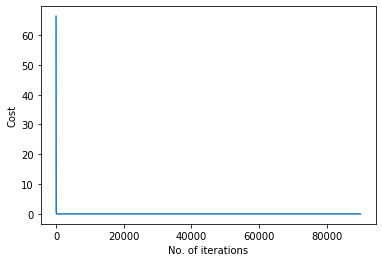

In [82]:
import matplotlib.pyplot as plt
cost = list(cost)
n_iterations = [x for x in range(1,90001)]
plt.plot(n_iterations, cost)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')

In [83]:
X_test = np.concatenate((np.ones((X_test.shape[0],1)), X_test),axis = 1)
predictions = hypothesis(theta,X_test, X_test.shape[1] - 1)

In [84]:
def get_mape(y_true, y_pred): 
    """
    Compute mean absolute percentage error (MAPE)
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [85]:
predictions_SalePrice=np.exp(predictions)
y_SalePrice_transformed=np.exp(y_actual_SalePrice)

In [86]:
mape = get_mape(y_SalePrice_transformed,predictions_SalePrice)
print(mape)

12.00033867680888


In [87]:
def calculateRMSE(Y_test, predictedTarget):
    """
    Compute Root Mean Square Error (RMSE)
    """
    modelRMSE = np.sqrt(sum((Y_test - predictedTarget) ** 2) / (Y_test.shape[0]));
    return modelRMSE;

In [88]:
rmse=calculateRMSE(y_actual_SalePrice,predictions)
print(rmse)

2.5909037603518024
